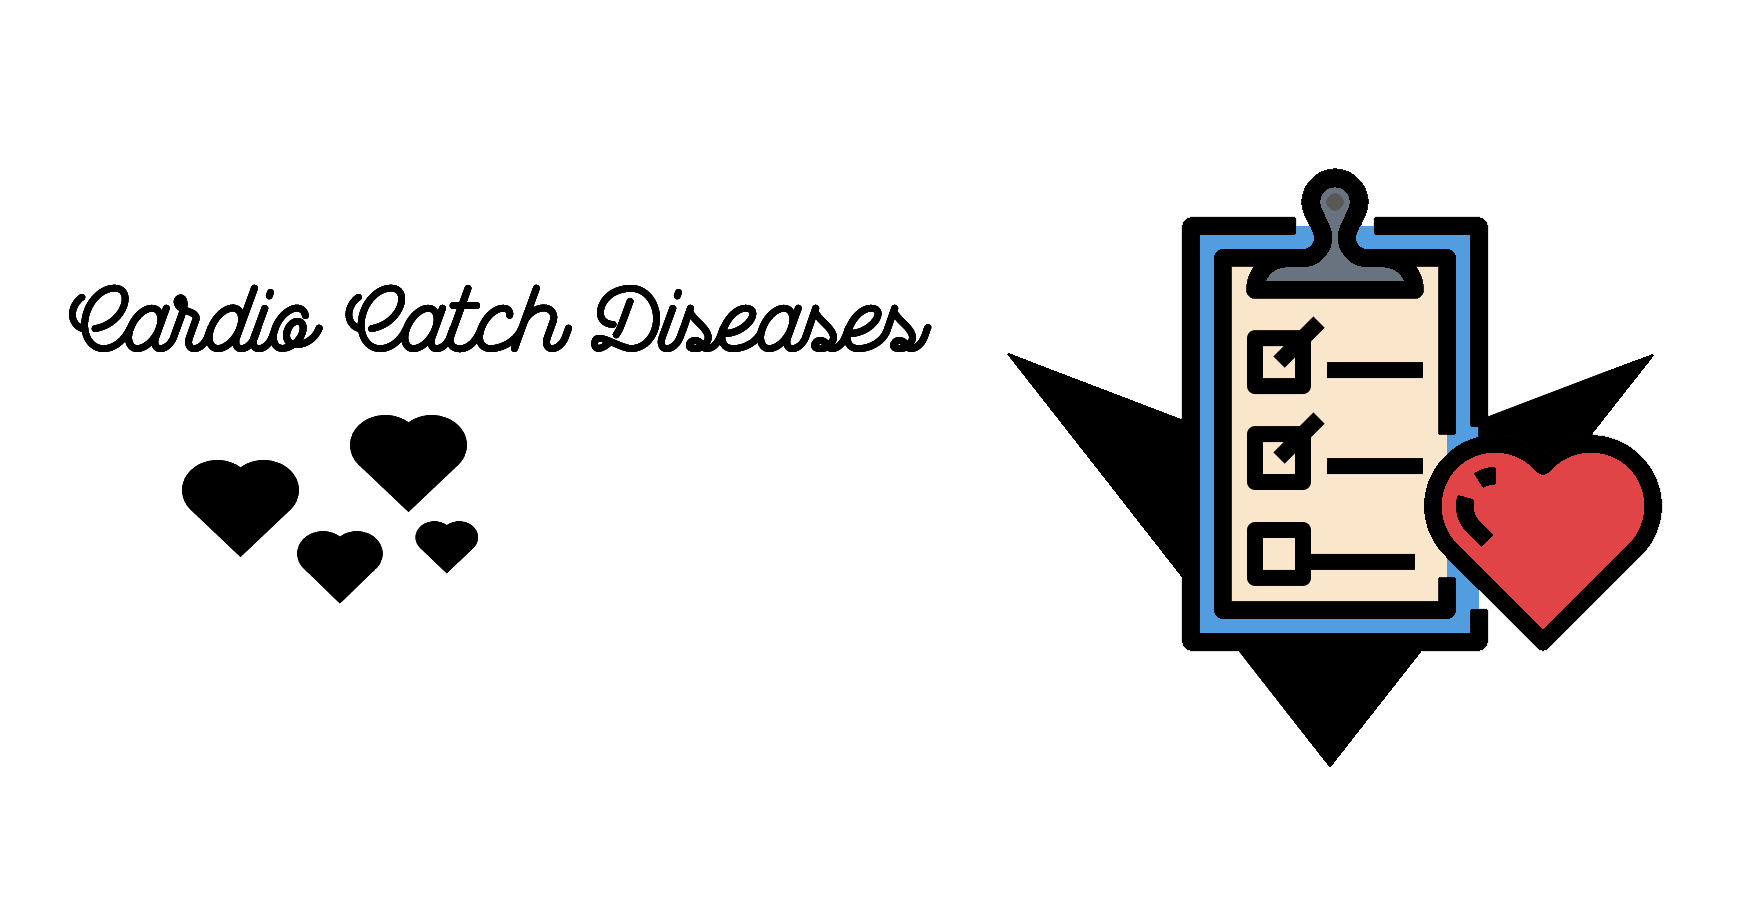

In [3]:
Image("../img/cardio2.png")

<p style="text-align:center"><i>Cadio Catch Diseases is a company specializing in early-stage heart disease detection. Its business model is of the service type, that is, the company offers the early diagnosis of a cardiovascular disease for a certain price.</i></p>

**Bussiness Context**<br>

Currently, the diagnosis of a cardiovascular disease is done manually by a team of specialists. The current accuracy of the diagnosis varies between 55% and 65%, due to the complexity of the diagnosis and also to the fatigue of the team that takes turns to minimize the risks. The cost of each diagnosis, including the equipment and the analysts' payroll, is around R$ 1,000.00.

1. *With a Model, get a better precison on cardiovascular diagnosis.*
2. *What is the precision and accuracy of this new tool?*
3. *How mutch profit the Cardio Catch Diseases will earn with this new tool?* 
4. *What is the confidence interval of this new tool?*

**What is a Cardiovascular Diseases ?**

Cardiovascular Diseases (CVD's) are a group of disorders of the heart and blood vessels.

Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain.

The most important behavioural risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol. The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity. These “intermediate risks factors” can be measured in primary care facilities and indicate an increased risk of heart attack, stroke, heart failure and other complications.

In addition, drug treatment of hypertension, diabetes and high blood lipids are necessary to reduce cardiovascular risk and prevent heart attacks and strokes among people with these conditions.

More Detail at: <a href='https://github.com/xGabrielR/Cardio-Catch-Diseases'>Project Documentation</a>

## 0.1. Imports

In [1]:
import math
import numpy  as np
import pandas as pd

from scipy import stats as ss
import matplotlib.pyplot as plt

from IPython.display import Image

## 0.2. Aux Functions

In [317]:
def simple_metrics(df, proportion):
    num_att = df.select_dtypes(include=['int64', 'float64'])
    c1 = pd.DataFrame(num_att.apply(np.mean)).T
    c2 = pd.DataFrame(num_att.apply(np.median)).T
    d1 = pd.DataFrame(num_att.apply(min)).T
    d2 = pd.DataFrame(num_att.apply(max)).T
    d3 = pd.DataFrame(num_att.apply(np.std)).T
    d4 = pd.DataFrame(num_att.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(num_att.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(num_att.apply(lambda x: x.kurtosis())).T
    trim_mean = pd.DataFrame(ss.trim_mean(num_att.values, proportion))

    m = pd.concat([d1, d2, c1, c2, d3, d4, d5, d6], axis=0).T.reset_index()
    m = pd.concat([m, trim_mean[0]], axis=1)
    m.columns = ['att', 'min', 'max', 'mean', 'median', 'std', 'range', 'skew', 'kurtosis', 'trim_mean']
    m = m[['att', 'min', 'max', 'mean', 'trim_mean', 'median', 'std', 'range', 'skew', 'kurtosis']]
    
    return m

## 0.3. Load Dataset

In [7]:
df_raw = pd.read_csv('../data/cardio_train.csv', sep=';')

# 1.0. Descriptive Statistical

In [41]:
df1 = df_raw.copy()

df1.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1


## 1.1. Rename Columns

In [42]:
df1.columns = [p.replace('ap_hi', 'systolic').replace('ap_lo', 'diastolic') for p in df1.columns]

## 1.2. Dataset Dimension

In [43]:
print(f'Number of Columns: {df1.shape[1]}')
print(f'Number of Rows: {df1.shape[0]}')

Number of Columns: 13
Number of Rows: 70000


## 1.3. Check Data Types

In [44]:
df1.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
systolic         int64
diastolic        int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

## 1.4. Check Na

In [46]:
df1.isna().sum() / len(df1)

id             0.0
age            0.0
gender         0.0
height         0.0
weight         0.0
systolic       0.0
diastolic      0.0
cholesterol    0.0
gluc           0.0
smoke          0.0
alco           0.0
active         0.0
cardio         0.0
dtype: float64

## 1.5. Fillout Na

- Do Not have Missing Values on Dataset

## 1.6. Change Data Types

- Age need to be a real integer number like: 50 years old, not count days.
- Normalize Height

In [54]:
df1.age = [math.floor(p/365) for p in df1.age.tolist()]

df1.height = df1.height/100

## 1.7. Desciptive Statistical

### 1.7.1. Numerical Attributes

- Mutch **Negative** Diastolic Number.
    - Do not exists -70 Diastolic.
    - With Pulmonary Artery Hypertension the mean is ( -2 +/- .7 mmHg )
    
    
- Mutch **Negative** Systolic Number.
    - Do not exists -150 Systolic.
    

- 250 Height and 250 Weight need atention check.

In [139]:
simple_metrics(df1, .25)

,att,min,max,mean,trim_mean,median,std,range,skew,kurtosis
0,age,29.00,64.0,52.840671,53.397371,53.00,6.766725,35.00,-0.305744,-0.818981
1,gender,1.00,2.0,1.349571,1.199143,1.00,0.476835,1.00,0.630960,-1.601935
2,height,0.55,2.5,1.643592,1.643626,1.65,0.082101,1.95,-0.642187,7.943653
3,weight,10.00,200.0,74.205690,72.431903,72.00,14.395654,190.00,1.012070,2.586825
4,systolic,-150.00,16020.0,128.817286,123.865800,120.00,154.010319,16170.00,85.296214,7580.074738
5,diastolic,-70.00,11000.0,96.630414,80.934629,80.00,188.471184,11070.00,32.114083,1425.914585
6,cholesterol,1.00,3.0,1.366871,1.003286,1.00,0.680245,2.00,1.587123,0.993901
7,gluc,1.00,3.0,1.226457,1.000000,1.00,0.572266,2.00,2.397462,4.294377
8,smoke,0.00,1.0,0.088129,0.000000,0.00,0.283482,1.00,2.905867,6.444250
9,alco,0.00,1.0,0.053771,0.000000,0.00,0.225566,1.00,3.956607,13.655125


### 1.7.2. Categorical Attributes

- Do Not have categorical data on Dataset.

# 2.0. Feature Engineering

## 2.1. Mind Map

In [145]:
df2 = df1.copy()

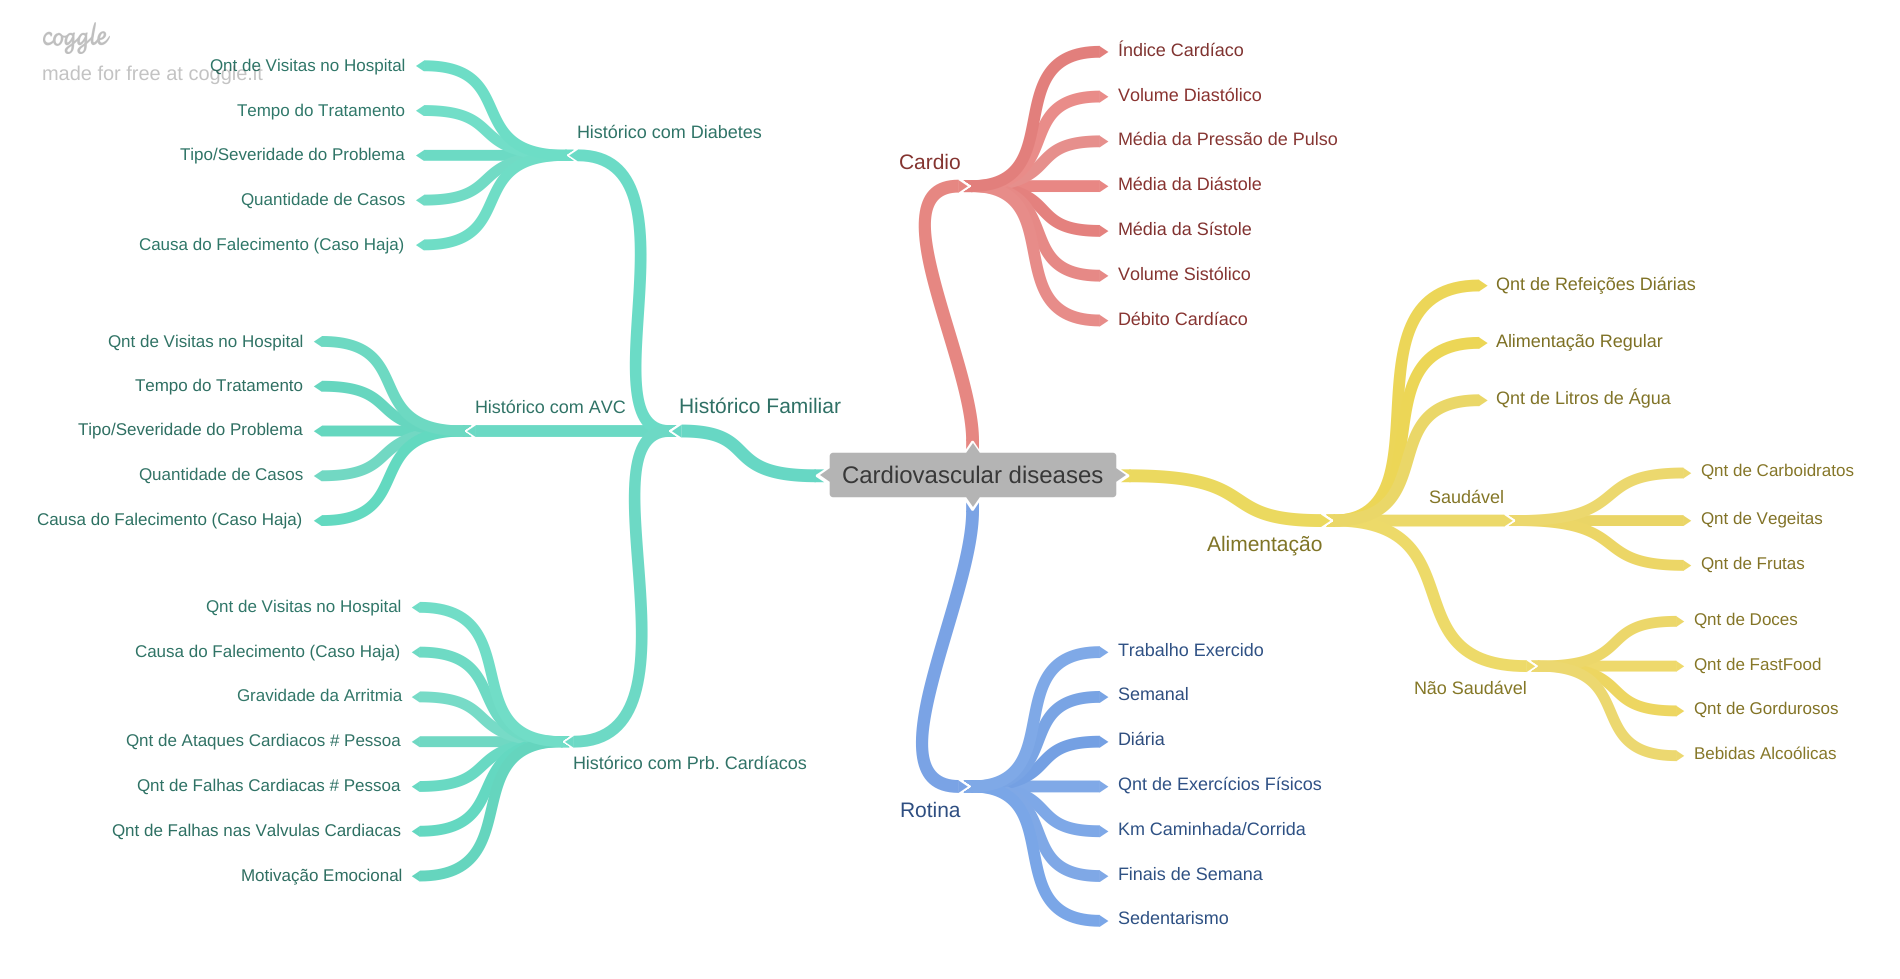

In [146]:
Image('../img/mindmap.png')

## 2.2. Hypothesis List

- Under Working

## 2.3. Feature Engineering

- Pulse Volume is difference between systolic and diastolic values.

For next cycle i try to make other documented features, but i do not have the data, and is easy to put bias on dataset or wrong columns values because have a range of values.

In [149]:
df2['pulse_pressure'] = df2['systolic'] - df2['diastolic']
df2['bmi'] = (df2['weight'] / (df2['height']**2))

## Possible Features
# Ídice Cardiaco
# Débito Cardiaco
# Btm # Min
# Volume Sistólico (60-70)
# Volume Sistólico Final (Ventriculo Esquerdo) (28.6 - 61.8)
# Volume Diastolico Final (Ventriculo Esquerdo) (98.4 - 158)
# Volume Sistolico Final (Ventriculo Direito) (35.2 - 72)
# Volume Diastolico Final (Ventriculo Direito) (95.8 - 157.2)

In [312]:
df2.head(2)

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,bmi
0,0,50,2,1.68,62.0,110,80,1,1,0,0,1,0,30,21.967120
1,1,55,1,1.56,85.0,140,90,3,1,0,0,1,1,50,34.927679


# 3.0. Dataset Filtering 

In [336]:
df3 = df2.copy()

## 3.1. Filtering Rows

- Define a Threshold for Diastolic and Systolic.

In [337]:
# On First Cycle
df3 = df3[(df3.systolic < 200)]#['systolic'].hist()
df3 = df3[~df3.systolic < 10]

df3 = df3[df3.diastolic < 160]
df3 = df3[~df3.diastolic < -5]

df3 = df3[df3.weight > 40]
df3 = df3[(df3.height > .70) & (df3.height < 2.30)]

df3 = df3[df3.bmi < 200]

In [338]:
# Next Cycle (Check if Exists Negative Pulse Pressure) *
df3[df3.pulse_pressure < 0].head(4)

,id,age,gender,height,weight,systolic,diastolic,cholesterol,gluc,smoke,alco,active,cardio,pulse_pressure,bmi
474,681,52,1,1.56,65.0,120,150,2,1,0,0,1,0,-30,26.709402
567,815,58,1,1.68,78.0,14,90,2,1,0,0,1,1,-76,27.636054
636,913,56,2,1.69,68.0,70,110,1,1,0,0,1,0,-40,23.808690
927,1294,59,2,1.75,70.0,14,90,3,1,0,0,1,1,-76,22.857143


## 3.2. Filtering Columns

In [339]:
df3 = df3.drop('id', axis=1)

## 3.3. Dataset Results

In [340]:
simple_metrics(df3, .20)

,att,min,max,mean,trim_mean,median,std,range,skew,kurtosis
0,age,29.000000,64.000000,52.823247,53.321585,53.000000,6.768622,35.000000,-0.303364,-0.821465
1,gender,1.000000,2.000000,1.348761,1.247938,1.000000,0.476578,1.000000,0.634699,-1.597204
2,height,0.710000,2.070000,1.644038,1.643434,1.650000,0.080156,1.360000,-0.216619,2.743388
3,weight,41.000000,200.000000,74.138342,72.564449,72.000000,14.234304,159.000000,1.020501,2.481201
4,systolic,7.000000,197.000000,126.176011,124.563822,120.000000,17.286475,190.000000,-0.034919,4.900911
5,diastolic,6.000000,150.000000,81.269947,81.419125,80.000000,9.550909,144.000000,0.203415,2.809041
6,cholesterol,1.000000,3.000000,1.363753,1.082403,1.000000,0.678279,2.000000,1.600585,1.038169
7,gluc,1.000000,3.000000,1.225366,1.000000,1.000000,0.571375,2.000000,2.406414,4.336585
8,smoke,0.000000,1.000000,0.087751,0.000000,0.000000,0.282932,1.000000,2.914186,6.492671
9,alco,0.000000,1.000000,0.053387,0.000000,0.000000,0.224804,1.000000,3.973446,13.788677


In [344]:
df3.to_csv('../data_backup/df3.csv')